In [14]:
%matplotlib notebook
import mcsActor.windowedCentroid.centroid as centroid
import mcsActor.mcsRoutines.mcsRoutines as mcsTools
from astropy.io import fits
import matplotlib.pylab as plt
from importlib import reload
from pfs.utils import butler
import pandas as pd
import pfs.utils.coordinates.transform as transformUtils
import numpy as np
import mcsActor.mcsRoutines.offlineID as offline
import os


## setup paths and variables

Change the data path to the directory where the fits files are, and choose the appropriate camera. 

In [15]:
dataPath = "/Users/karr/Science/Data/PFS/convergeTests/20220222_009/data/"

# camera (canon for on telescope)
cameraName = 'rmod_71m'
#cameraName = 'canon_50m'

# get the geometry
bbutler = butler.Butler()
pfi = bbutler.get("moduleXml", moduleName="ALL", version="")
dots = bbutler.get("black_dots", moduleName="ALL", version="")
fids = bbutler.get('fiducials')

# variables for IDing
centrePos, armLength, dotPos, goodIdx, des = mcsTools.readCobraGeometry(pfi,dots)
adjacentCobras = mcsTools.makeAdjacentList(centrePos, armLength)
centParms = mcsTools.getCentroidParams([])
fidPos =  np.array([fids['fiducialId'],fids['x_mm'],fids['y_mm']]).T


2022-07-07 13:00:50.168Z root             30 spectroIds.py:39 no dns.resolver library available, using "S"


## run fibreID

Pass a frame ID, the routine does the centroiding, matching and returns 

cobraMatch of of length(ncobras) where
0: cobraID
1: spotID (in centroids)
2: x_mm
3: y_mm

fidMatch
0: fiducialID
1: spotID (in centroids)
2: x_mm
3: y_mm

centroids
raw centroids in pixels



In [ ]:
#version for fits files

# list of frameIDs
frameID = 7612200

cobraMatch,fidMatch,centroids=offline.runMatchFile(frameID,dataPath,centParms,cameraName,fids,centrePos,armLength,dotPos,goodIdx,adjacentCobras,centrePos)


In [18]:
# version for query from database dumped to csv (mcs_exposure and mcs_data)
reload(offline)
# list of frameIDs
frameID = 7612200

expData = pd.read_csv("/Users/karr/mcsExposure_7612200.csv")
mcsData = pd.read_csv("/Users/karr/mcsData_7612200.csv")

cobraMatch,fidMatch,centroids=offline.runMatchDF(frameID,mcsData,expData,cameraName,fids,centrePos,armLength,dotPos,goodIdx,adjacentCobras,centrePos)


In [ ]:
# version for DB
frameID = 7612200

sql = """select * from mcs_exposure where mcs_frame_id=7612200"""
expData = db.fetch_query(sql)
sql = """select * from mcs_data where mcs_frame_id=7612200"""
mcsData = db.fetch_query(sql)

cobraMatch,fidMatch,centroids=offline.runMatchDF(frameID,mcsData,centroidData,cameraName,fids,centrePos,armLength,dotPos,goodIdx,adjacentCobras,centrePos)




<IPython.core.display.Javascript object>


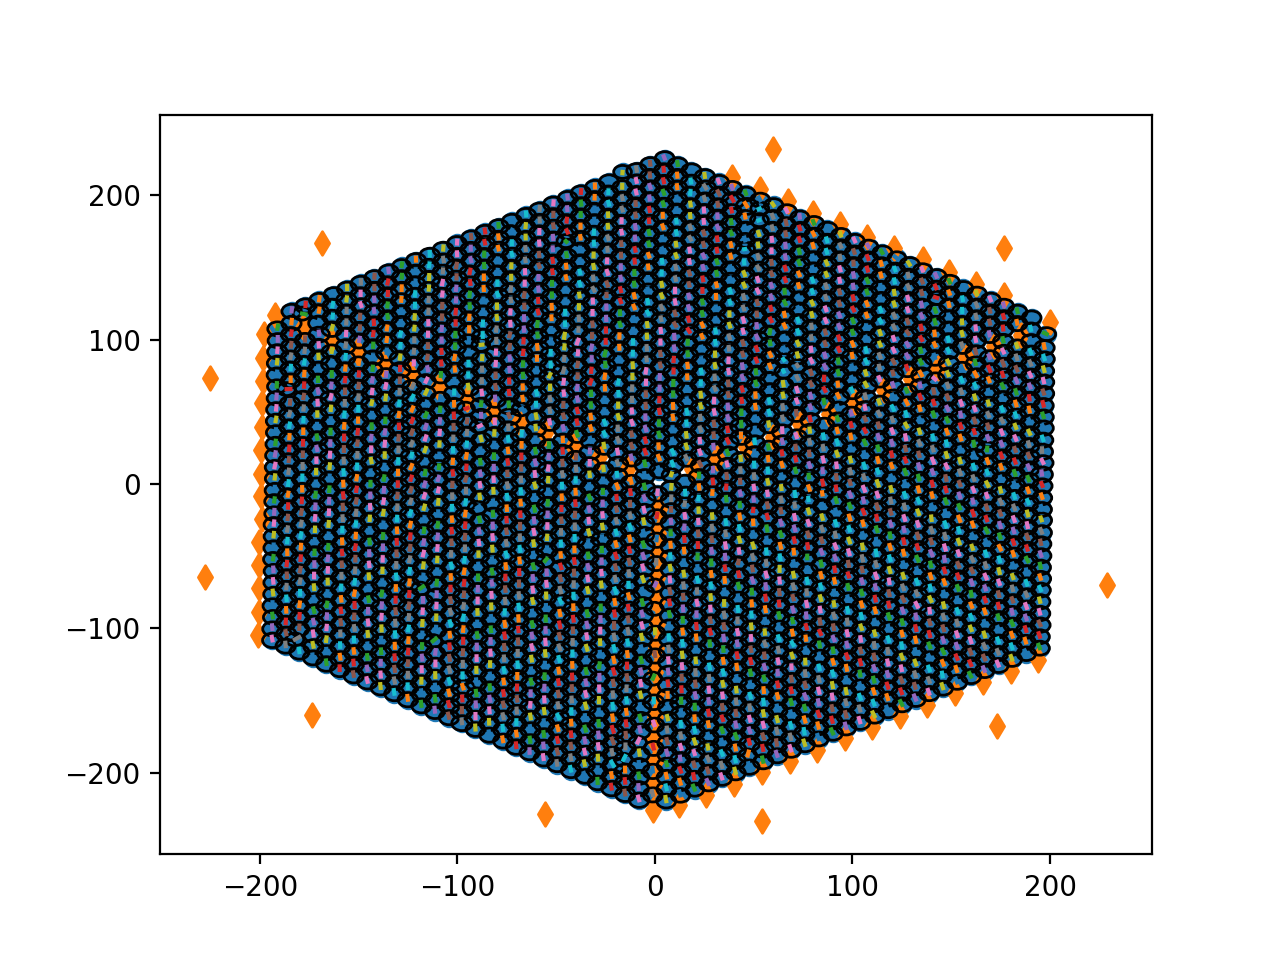

In [13]:
fig,ax=plt.subplots()
for i in range(len(goodIdx)):
    ax.plot([cobraMatch[i,2],des.centers.real[goodIdx[i]]],[cobraMatch[i,3],des.centers.imag[goodIdx[i]]])
ax.scatter(centrePos[:,1],centrePos[:,2])
ax.scatter(fids['x_mm'],fids['y_mm'],marker="d")
for i in range(len(centrePos)):
    circle=plt.Circle((centrePos[i,1],centrePos[i,2]),armLength[i],fill=False,color='black')
    a=ax.add_artist(circle)

